In [10]:
# carga de librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
datos_ventas = ventas agrupadas por canasta 
datos_canasta = "ventas1", ventas individuales sin agrupar y contiene todos los productos comprados
datos_productos = lista de productos y sus códigos
datos_movimientos = contiene los movimientos realizados con fecha y hora x cada producto.
"""

#lectura de archivos de ventas
datos_ventas = pd.read_excel('./datasets/030122_ventas.xlsx')
datos_canasta = pd.read_excel('./datasets/030122_ventas1.xlsx')
datos_productos = pd.read_excel('./datasets/030122_productos.xlsx')
datos_movimientos = pd.read_excel('./datasets/030122_movimientos.xlsx')

In [11]:
#muestra datos de canastas
datos_canasta

#datos_movimientos.head()

,EmpCod,VenNro,PrdCod,VenIteCnt,VenItePrc,VenIteIde
0,1,11,952,1.0,2000,V
1,1,11,975,3.0,1000,V
2,1,11,989,6.0,700,V
3,1,11,1178,1.0,500,V
4,1,12,111,2.0,900,V
...,...,...,...,...,...,...
244368,1,97656,1305,1.0,500,V
244369,1,97656,1687,1.0,2200,V
244370,1,97657,991,1.0,850,V
244371,1,97657,1538,1.0,500,V


In [12]:
#cuales son los tipos de datos
datos_canasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244373 entries, 0 to 244372
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   EmpCod     244373 non-null  int64  
 1   VenNro     244373 non-null  int64  
 2   PrdCod     244373 non-null  int64  
 3   VenIteCnt  244373 non-null  float64
 4   VenItePrc  244373 non-null  int64  
 5   VenIteIde  244373 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 11.2+ MB


In [13]:
# existen datos nulos ?
datos_canasta.isnull().sum()

EmpCod       0
VenNro       0
PrdCod       0
VenIteCnt    0
VenItePrc    0
VenIteIde    0
dtype: int64

### Cuántas tipos de canastas diferentes existen

In [14]:
# periodo de análisis

datos = datos_movimientos['MovFch']
print(f'fecha inicio: ' + str(min(datos)))
print(f'fecha final: ' + str(max(datos)))

# números de canastas únicas

print('\nCanastas únicas: ' + str(len(datos_canasta['VenNro'].unique())))

fecha inicio: 2020-08-09 00:00:00
fecha final: 2021-12-03 00:00:00

Canastas únicas: 97646


### cuántos productos son incluidos en las canastas. 

Se analiza la cantidad de productos, mostrando algunas medidas como, max, min, media, median. Y también de forma gráfica

In [15]:
# agrupar por canasta y contar los productos que existen

datos_canasta.groupby('VenNro').VenNro.count().reset_index(name='CantidadProductos')


,VenNro,CantidadProductos
0,11,4
1,12,14
2,13,1
3,14,1
4,15,1
...,...,...
97641,97653,2
97642,97654,3
97643,97655,1
97644,97656,2


In [16]:
#agrupar datos por N° venta y código de producto. Se suma la cantidad y se cuenta cuántas veces el 
resultado = datos_canasta.groupby(['VenNro','PrdCod']).VenIteCnt.agg(['sum','count'])
print(resultado.head(5))

# verificar si existen cod. productos duplicados en las canastas.
"""
Count, indica si existen duplicidad de cod. de productos
Sum, suma la cantidad vendida por cada cod. de productos
"""
print('\nN° canastas con productos duplicados: ', len(resultado[resultado['count'] >1]))
print('N° canastas sin productos: ', len(resultado[resultado['count'] == 0]))


               sum  count
VenNro PrdCod            
11     952     1.0      1
       975     3.0      1
       989     6.0      1
       1178    1.0      1
12     111     2.0      1

N° canastas con productos duplicados:  0
N° canastas sin productos:  0


In [17]:
"""
Agrupación por canastas únicas.
CantidadProducts, se agrupan por cod. productos
"""
# se agrega la cantidad de productos agrupado
productos_canasta = datos_canasta.groupby('VenNro').agg(
    CantidadProductos=('PrdCod', 'count')
).reset_index()

print(productos_canasta.head(5))

productos_canasta.describe()

   VenNro  CantidadProductos
0      11                  4
1      12                 14
2      13                  1
3      14                  1
4      15                  1


,VenNro,CantidadProductos
count,97646.000000,97646.000000
mean,48834.493743,2.502642
std,28188.127300,2.071666
min,11.000000,1.000000
25%,24423.250000,1.000000
50%,48834.500000,2.000000
75%,73245.750000,3.000000
max,97657.000000,54.000000


Se puede ver desde el resumen, que existen outliers y que se requiere verificar en las siguientes secciones.

C:\Users\darw_\AppData\Local\Temp\ipykernel_23968\3215085479.py:41: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.ecdfplot(base_datos, x='CantidadProductos', palette=['blue'], ax=axes[1])


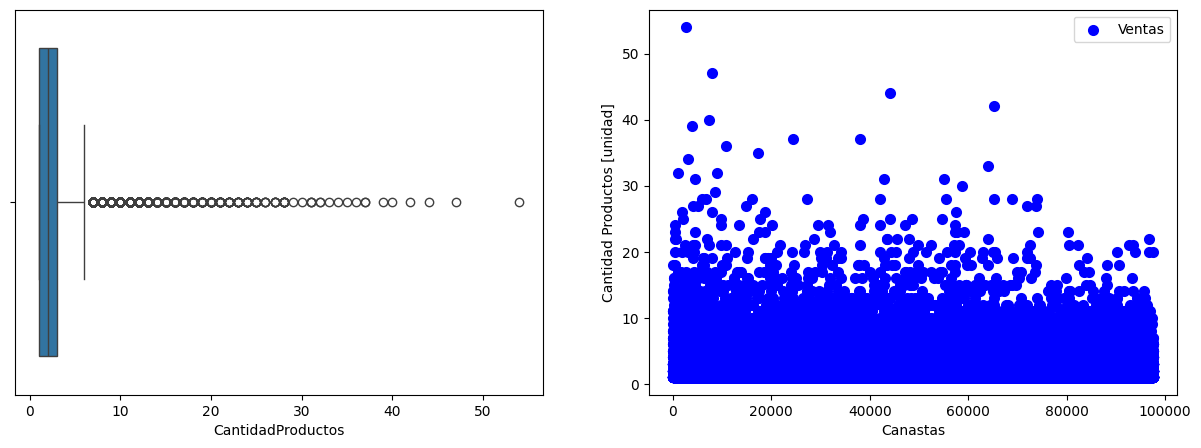

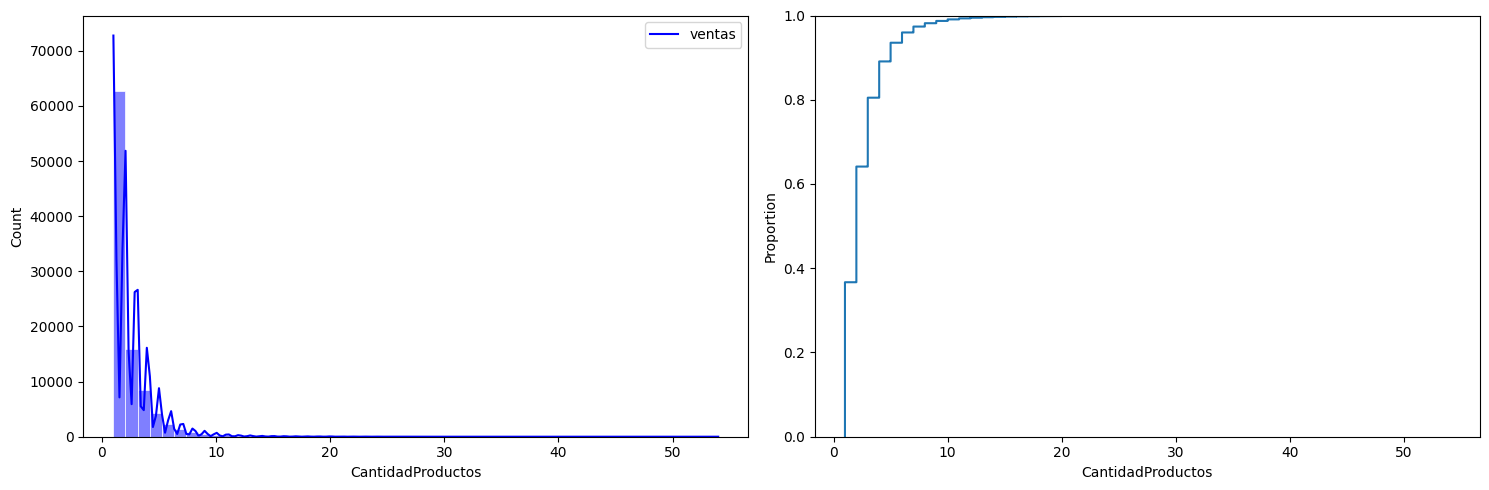

In [18]:
"""
Visualizacion de la distribución de la cantidad de productos en cada canasta.
(izq) gráfico de cajas, (der) scatter
"""

figura_tamaño = (15,5)

fig, axes = plt.subplots(1,2, figsize=figura_tamaño)

# valores a mostrar
x = productos_canasta.index
y = productos_canasta['CantidadProductos']
base_datos = productos_canasta

# muestra boxplot para tag 1 y tag 2
sns.boxplot(data=base_datos, x="CantidadProductos", ax=axes[0])

# grafica los datos 
axes[1].scatter(x, y, linewidth=2.0, color='blue')

plt.xlabel('Canastas') 
plt.ylabel('Cantidad Productos [unidad]') 
plt.legend(["Ventas"], loc="upper right")
plt.show
#---------------------

"""
Visualizacion de la distribución de la cantidad de productos en cada canasta.
(izq) histograma, (der) distribucion acumulativa
"""

fig , axes= plt.subplots(1,2, figsize= figura_tamaño)
axes = axes.ravel()

sns.histplot(y, bins=50, linewidth=0.5, edgecolor="white", color='blue', kde=True, ax=axes[0])
#sns.violinplot(data=base_datos, x="CantidadProductos", ax=axes[0] )
axes[0].legend(["ventas"], loc="upper right")


# distribución acumulativa
sns.ecdfplot(base_datos, x='CantidadProductos', palette=['blue'], ax=axes[1])

fig.tight_layout()
plt.show()

Se puede verificar que +95% de la distribución está 1 y 15 productos. Y existen casos con mayor cantidad de productos pero son casos menos probable que son identificados como outliers.
Por lo tanto, se toma la decisión de considerar en un análisis hasta 15 productos.

In [19]:
"""
Filtrado de datos por cantidad de productos en canasta <=15
"""
cantidad_productos = 15
canastas_menor10productos = productos_canasta[productos_canasta['CantidadProductos'] <= cantidad_productos]
canastas_mayor10productos = productos_canasta[productos_canasta['CantidadProductos'] >= cantidad_productos]

print(f'Cantidad canastas menor a {cantidad_productos} productos:', len(canastas_menor10productos))
print(f'Cantidad canastas mayor a {cantidad_productos} productos:', len(canastas_mayor10productos))

#-------------------------- texto a mostrar 
print(f'\ndatos filtrados para menor igual a {cantidad_productos} productos')

datos_filtrados =datos_canasta[datos_canasta['VenNro'].isin(canastas_menor10productos['VenNro'])]
datos_filtrados

Cantidad canastas menor a 15 productos: 97385
Cantidad canastas mayor a 15 productos: 326

datos filtrados para menor igual a 15 productos


,EmpCod,VenNro,PrdCod,VenIteCnt,VenItePrc,VenIteIde
0,1,11,952,1.0,2000,V
1,1,11,975,3.0,1000,V
2,1,11,989,6.0,700,V
3,1,11,1178,1.0,500,V
4,1,12,111,2.0,900,V
...,...,...,...,...,...,...
244368,1,97656,1305,1.0,500,V
244369,1,97656,1687,1.0,2200,V
244370,1,97657,991,1.0,850,V
244371,1,97657,1538,1.0,500,V


### Productos son los más vendidos

Se realiza el análisis durante el periodo completo obtenido desde los datos.

In [20]:
import datetime as dt
from datetime import timedelta
"""
Función que permite calcular la cantidad de semanas en los datos analizados
devuelve el n° de semanas
input : dataframe ventas
"""


def semanas_ventas(data_ventas):
    datos = data_ventas['MovFch']
    fecha_inicio =  min(datos)
    fecha_final = max(datos)
    fecha_inicio, fecha_final
    total_dias = (fecha_final- fecha_inicio)/timedelta(days=1)
    return round(total_dias/7)

In [21]:
#cantidad de veces que los cod. productos son comprados
#-------------------------- texto a mostrar 
#Se agrupan los datos por cod. Producto y se cuentan las veces que han comprado el producto

productos_ordenados = datos_filtrados.groupby('PrdCod').PrdCod.count().reset_index(name='vecesComprado').sort_values(by='vecesComprado', ascending=False)
#print(productos_ordenados)


"""
Filtrado de datos por cantidad de ventas al año
se asigna que la mínima frec de ventas a analizar es
un producto debe venderse al menos 2 veces a la semana o 7 días, lunes a domingo.

"""
ventas_porSemanas = 2
ventas_min_año = ventas_porSemanas * semanas_ventas(datos_movimientos)

#filtrado por mínimo de ventas
productos_conMasVentas = productos_ordenados[productos_ordenados['vecesComprado'] >= ventas_min_año]

#filtramos nuevamente la base "datos_filtrados"
#-------------------------- texto a mostrar 
print(f'\ndatos original, tamaño {len(datos_filtrados)}')
datos_filtrados =datos_filtrados[datos_filtrados['PrdCod'].isin(productos_conMasVentas['PrdCod'])]

#-------------------------- texto a mostrar 
print(f'datos filtrados, después, tamaño {len(datos_filtrados)}')
datos_filtrados



datos original, tamaño 238947
datos filtrados, después, tamaño 200967


,EmpCod,VenNro,PrdCod,VenIteCnt,VenItePrc,VenIteIde
1,1,11,975,3.0,1000,V
2,1,11,989,6.0,700,V
3,1,11,1178,1.0,500,V
4,1,12,111,2.0,900,V
5,1,12,965,1.0,1300,V
...,...,...,...,...,...,...
244368,1,97656,1305,1.0,500,V
244369,1,97656,1687,1.0,2200,V
244370,1,97657,991,1.0,850,V
244371,1,97657,1538,1.0,500,V


In [22]:
"""
agrupación de datos por cantidad de veces comprada
y ponderación en las ventas totales

"""
# agrupar por cuántas veces se compró un producto y su acumulado

productos_agrupados = datos_filtrados.groupby('PrdCod').agg(vecesComprado=('PrdCod', 'count')).reset_index().sort_values(by = 'vecesComprado' ,ascending=False)
productos_agrupados['sumaAcumulada'] = productos_agrupados['vecesComprado'].cumsum()
productos_agrupados['porcentaje'] = (productos_agrupados['vecesComprado'].cumsum() / productos_agrupados['vecesComprado'].sum()) * 100
#print(productos_agrupados)

# top 10 productos con mayor cantidad de veces comprados
top=10
producto_top = productos_agrupados.head(top).sort_values(by='vecesComprado', ascending=False)
#.reset_index(drop=True)
print(f'Top {top} productos: ')
producto_top


Top 10 productos: 


,PrdCod,vecesComprado,sumaAcumulada,porcentaje
103,1188,8131,8131,4.045938
277,1627,7665,15796,7.859997
248,1537,4111,19907,9.905606
86,1159,3981,23888,11.886529
152,1269,3631,27519,13.693293
163,1287,3194,30713,15.282609
294,1704,3167,33880,16.858489
257,1559,2982,36862,18.342315
90,1163,2533,39395,19.602721
11,955,2272,41667,20.733255


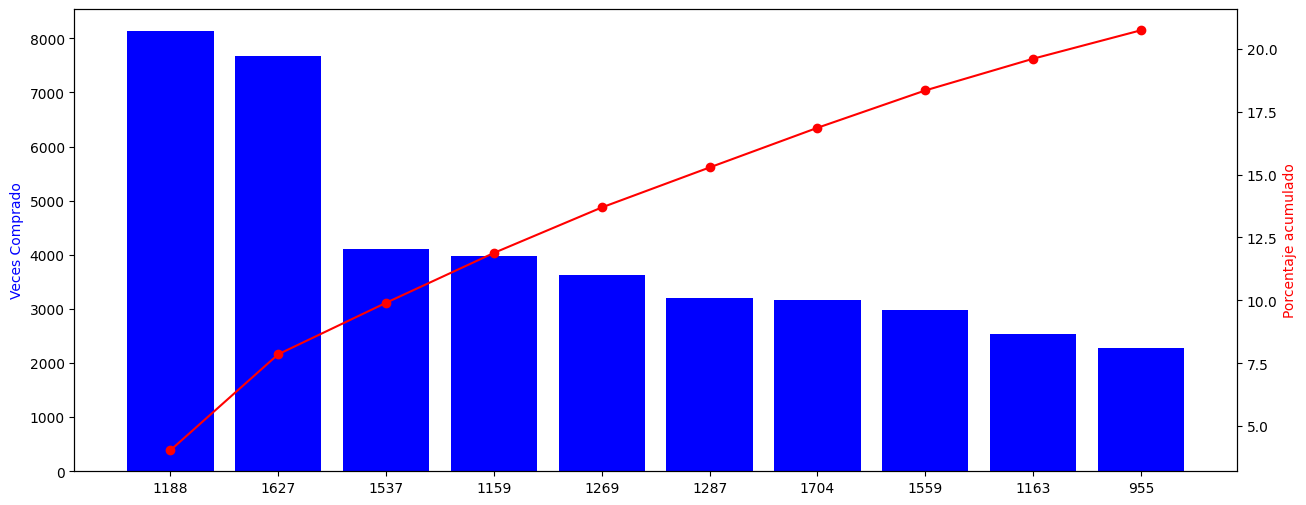

In [23]:
"""
Visualizacion de los productos vendidos ordenados
"""
dframe = producto_top
figura_tamaño = (15,6)
x = 'PrdCod'
y1= 'vecesComprado'
y2= 'sumaAcumulada'
y3 = 'porcentaje'

#convertir desde int a str
dframe[x] = dframe[x].astype('str')

# figura
fig, ax1 = plt.subplots(figsize= figura_tamaño)

# Bar plot
ax1.bar(dframe[x], dframe[y1], color='b')
ax1.set_ylabel('Veces Comprado', color='b')

# Line plot 
ax2 = ax1.twinx()
ax2.plot(dframe[x], dframe[y3], color='r', marker='o')
ax2.set_ylabel('Porcentaje acumulado', color='r')

# mostrar
plt.show()

### Análisis de estacionalidad

se selecciona un solo producto para realizar un análisis por día.

In [86]:
import datetime as dt

# se realiza una copia de los datos bases de movimientos
datos_movimientos_modificado = datos_movimientos

#se combina fecha y hora en una columna
datos_movimientos_modificado['timestamp'] = pd.to_datetime(datos_movimientos_modificado['MovFch'].astype(str) + ' ' + datos_movimientos_modificado['MovHor'].astype(str))
datos_movimientos_modificado['Week'] = datos_movimientos_modificado['timestamp'].dt.strftime('%U').astype(int)

# prod. más vendido
""" 
se selecciona un producto desde producto_top, top10
como prueba se realiza con redbull que es el producto[2] que corresponde al 3 producto más vendido
"""
producto = producto_top['PrdCod'].astype(int).tolist()[2]
nombre_producto = datos_productos[datos_productos['PrdCod'] == producto]['PrdDsc'].values[0]

#filtro por producto seleccionado
filtro = datos_movimientos_modificado[datos_movimientos_modificado['PrdCod'] == producto]

# agrupar por día
ventas_dia = filtro.groupby(filtro['timestamp'].dt.date)['MovCnt'].sum().reset_index(name='ventas')
print(f'Ventas por dia para {nombre_producto} :')
ventas_dia.head(5)


Ventas por dia para RED BULL 250 ML :


,timestamp,ventas
0,2020-10-02,3.0
1,2020-10-03,15.0
2,2020-10-04,16.0
3,2020-10-05,4.0
4,2020-10-06,11.0


Text(0.5, 1.0, 'RED BULL 250 ML')

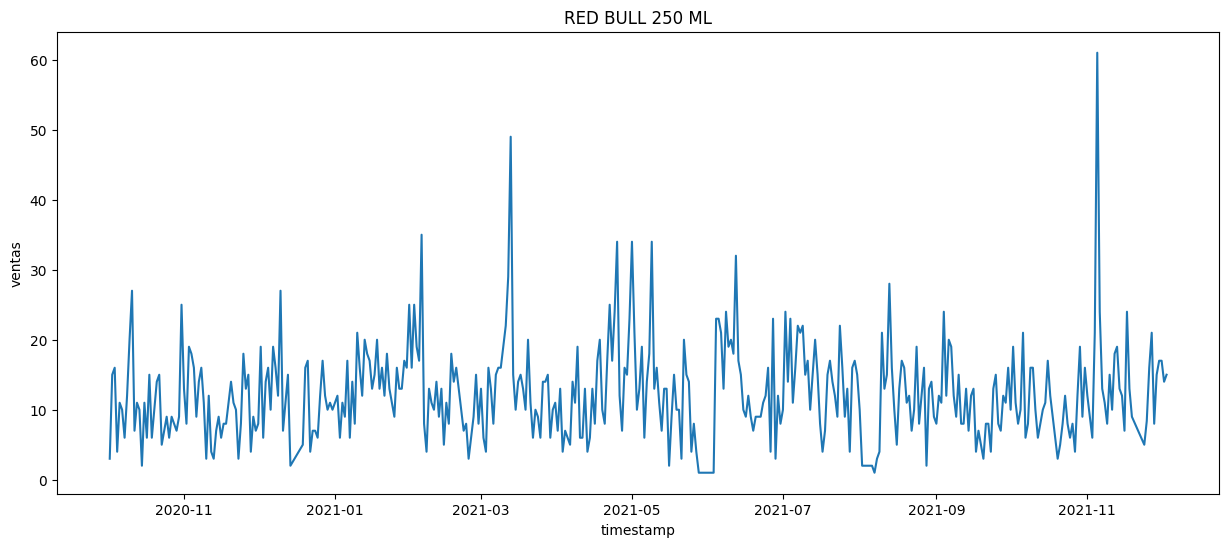

In [25]:
#graficamos ventas por día
figura_tamaño = (15,6)
fig, ax1 = plt.subplots(figsize= figura_tamaño)
sns.lineplot(data=ventas_dia, x='timestamp', y='ventas')
plt.title(f'{nombre_producto}')

### Se realiza un test estadístico para corroborar si existe o no estacionalidad:

$$H_{0} = No \; estacionario $$

Se usa Augmented Dickey-Fuller Test (ADF)

In [87]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from statsmodels.tsa.stattools import adfuller

In [92]:
resultado_test = adfuller(ventas_dia['ventas'], autolag="AIC")

# Extraer resultados
adf_statistic = resultado_test[0]
p_value = resultado_test[1]
use_lag = resultado_test[2]
num_obs = resultado_test[3]
critical_values = resultado_test[4]

# mostrar resultados
print(f'ADF Estadistico: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'lag usados: {use_lag}')
print(f'numero de observaciones: {num_obs}')
print('valores críticos:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Estadistico: -14.537323314551099
p-value: 5.21350822136927e-27
lag usados: 0
numero de observaciones: 410
valores críticos:
   1%: -3.4464005219454155
   5%: -2.868615280538588
   10%: -2.570538905413444


* El p value es más pequeño que el valor significativo 0.05
* El estadístico es menor (más negativo) que los valores críticos, incluso que el 10%, lo que fortalece la evidencia contra $H_{0}$ hipótesis.
* Finalmente, se rechaza la hipótesis y si existe estacionalidad en los datos.

### Descomposición de los datos en la forma más simple:
 $ y[t] = T[t] + S[t] + e[t]$

* Tendencia, tendencia de los datos
* Seasonal, patrón cíclico encontrado
* residual; datos que no son explicados, ruido:
* Observed : datos originales

In [28]:
# se realiza la descomposición simple y se analiza en un periodo de 7 días, 1 semana como ventana de tiempo

result = sm.tsa.seasonal_decompose(ventas_dia['ventas'], model='additive', period = 7)
results_df = pd.DataFrame({'tendencia': result.trend, 'estacional': result.seasonal, 'residuos': result.resid, 'observado': result.observed})
results_df



,tendencia,estacional,residuos,observado
0,NaN,-0.711657,NaN,3.0
1,NaN,0.623318,NaN,15.0
2,NaN,1.558873,NaN,16.0
3,9.285714,0.132419,-5.418133,4.0
4,10.571429,-0.524465,0.953037,11.0
...,...,...,...,...
406,15.428571,-0.711657,0.283086,15.0
407,15.285714,0.623318,1.090968,17.0
408,NaN,1.558873,NaN,17.0
409,NaN,0.132419,NaN,14.0


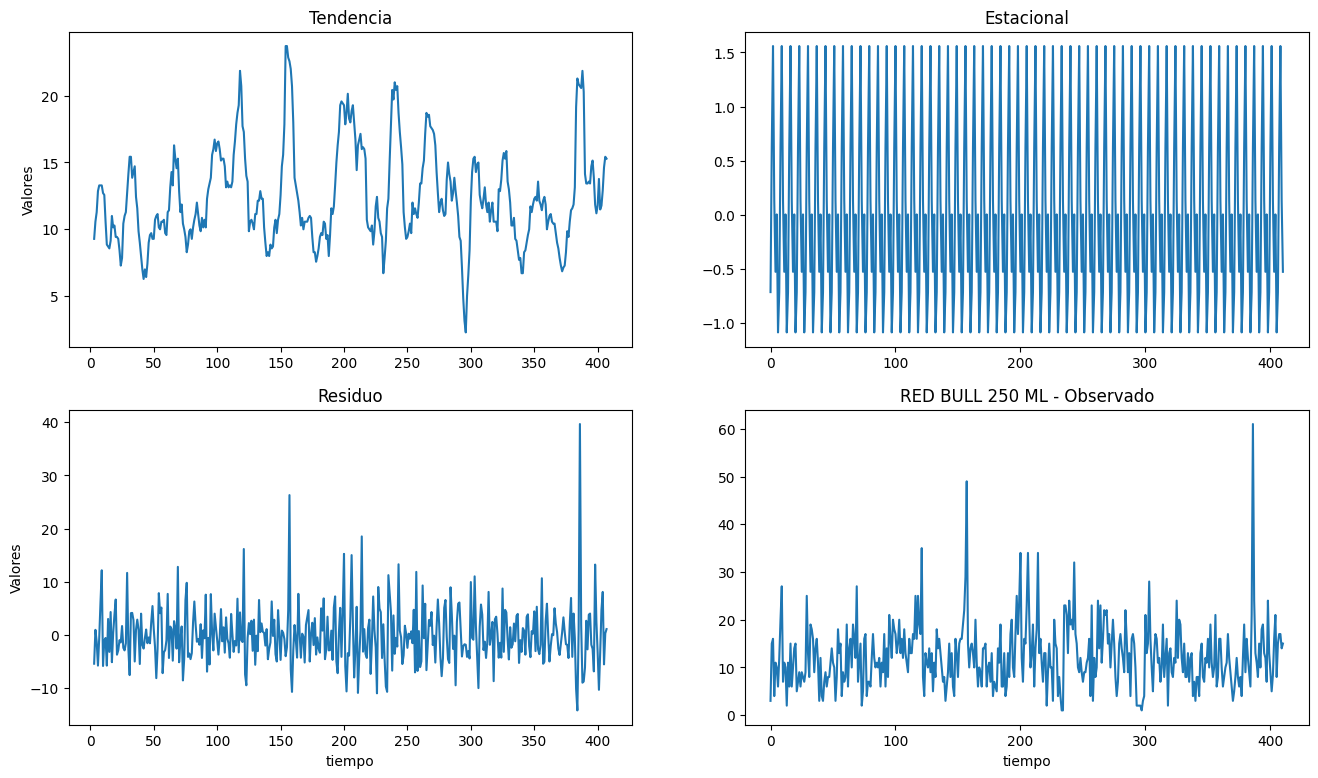

In [29]:
#Se grafica los datos de tendencia, estacionalidad, residuo, y datos originales

fig, ax = plt.subplots(ncols = 2, nrows = 2,figsize=(16,9))
df = ventas_dia
ax[0,0].plot(df.index, results_df.tendencia)
ax[0,0].set_title('Tendencia')
ax[0,0].set_ylabel('Valores')

ax[0,1].plot(df.index, results_df.estacional)
ax[0,1].set_title('Estacional')

ax[1,0].plot(df.index, results_df.residuos)
ax[1,0].set_title('Residuo')
ax[1,0].set_ylabel('Valores')
ax[1,0].set_xlabel('tiempo')

ax[1,1].plot(df.index, results_df.observado)
ax[1,1].set_title('Observado')
ax[1,1].set_xlabel('tiempo')

plt.savefig(f'Estacional{nombre_producto}.png')
plt.title(f'{nombre_producto} - Observado')
plt.show()

* se detecta que existe un cierto patrón en las ventas que se repite durante las semanas = 7 días [Estacional]
* La tendencia de las ventas tiende a mantenerse con un valor medio constante. [tendencia]
* Existen periodos donde hay más o menos compras que no siguen un patron [Residuo]

### análisis de media y varianza

Se considera la misma ventana de tiempo de 7 días para analizar

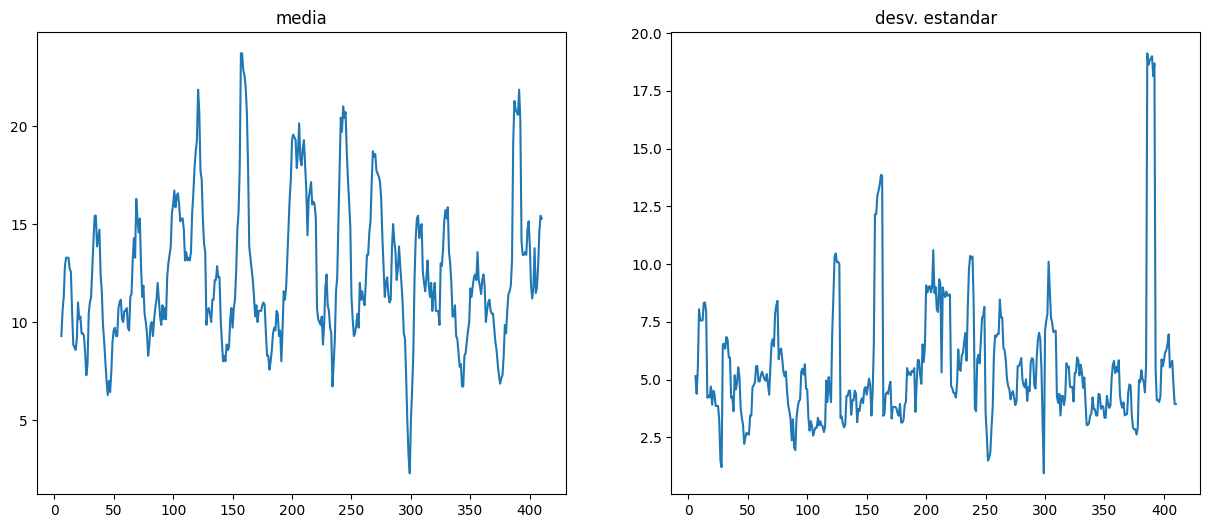

In [84]:
fig , ax= plt.subplots(1,2, figsize= figura_tamaño)
ax[0].plot(ventas_dia['ventas'].rolling(window=7).mean())
ax[0].set_title("media")
ax[1].plot(ventas_dia['ventas'].rolling(window=7).std())
ax[1].set_title('desv. estandar')
plt.show()

* Se aprecian que en ambos casos existe se mantienen bastante constrante. media y desv. estandar

In [30]:
# agrupar por semanas
ventas_semanas = filtro.groupby('Week')['MovCnt'].sum().reset_index(name='ventas')
ventas_semanas.head(5)

,Week,ventas
0,0,12.0
1,1,71.0
2,2,117.0
3,3,107.0
4,4,95.0


Text(0.5, 1.0, 'RED BULL 250 ML')

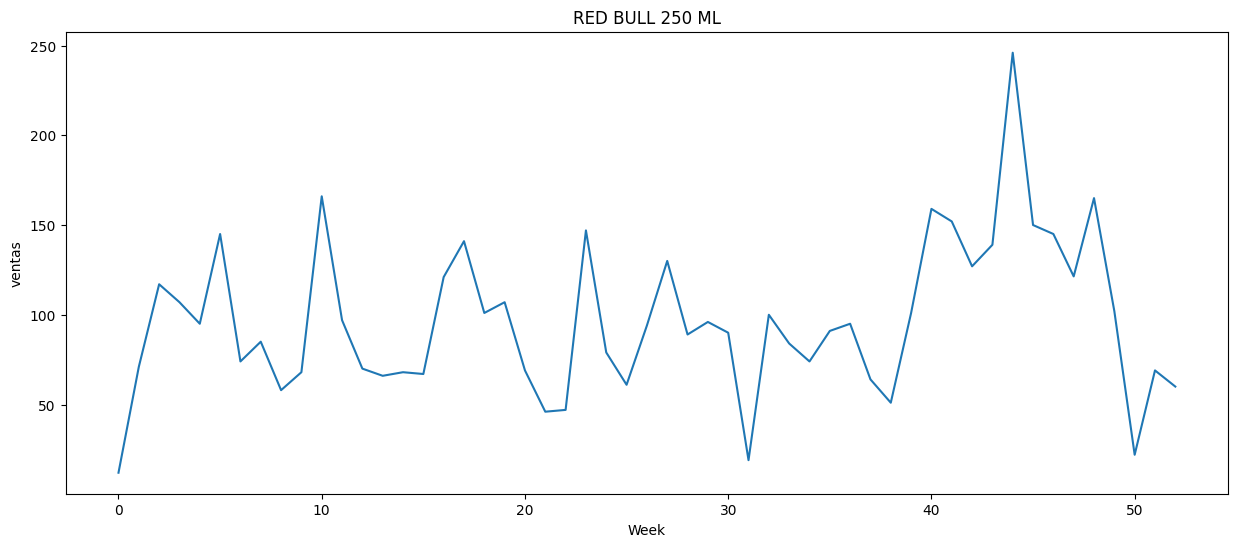

In [31]:
#graficamos
figura_tamaño = (15,6)
fig, ax1 = plt.subplots(figsize= figura_tamaño)
sns.lineplot(data=ventas_semanas, x='Week', y='ventas')
plt.title(f'{nombre_producto}')

### prueba de homogeneidad

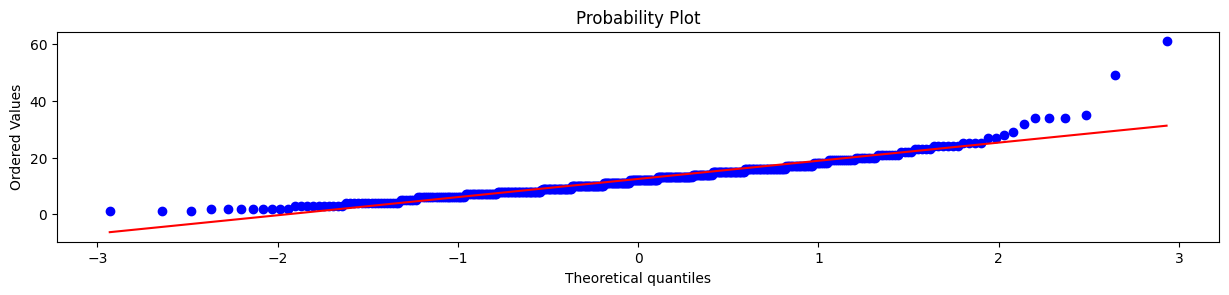

In [33]:
fig = plt.figure(figsize=figura_tamaño)

ax1 = fig.add_subplot(211)
prob = stats.probplot(ventas_dia['ventas'], dist=stats.norm, plot=ax1)

Se realiza una transformación Box-Cox para darle homogeneidad

el lambda óptimo es: 0.4060017225764735


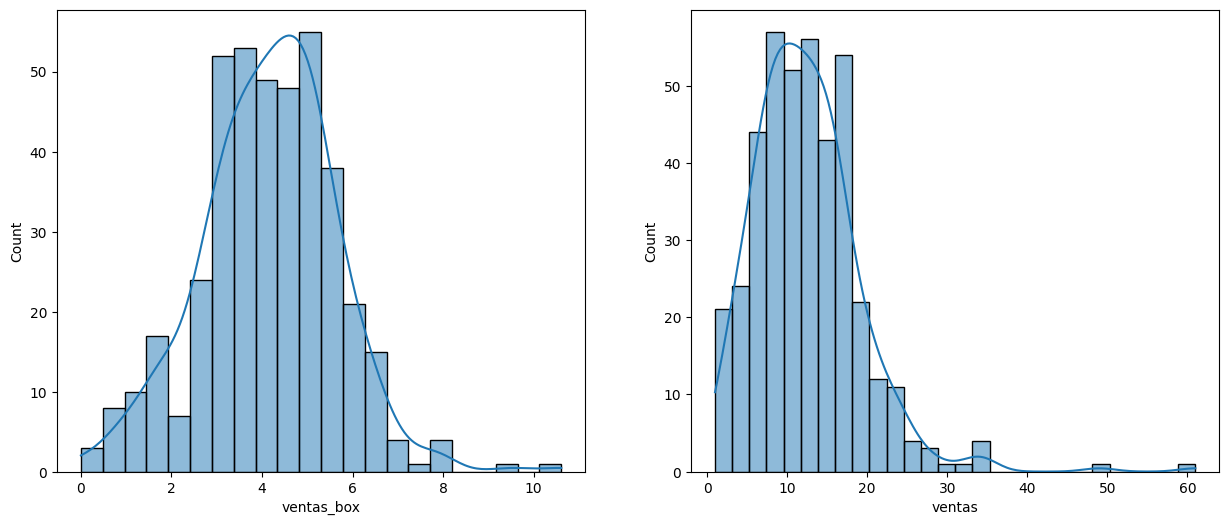

In [35]:
#se reliza la transformación agregando columna con valores nuevos
ventas_dia['ventas_box'], mejor_lambda = stats.boxcox(ventas_dia['ventas'])

#configuración figura
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figura_tamaño)

# se muestra ambas distribuciones, con y sin transformación
sns.histplot(ventas_dia['ventas_box'], kde=True, ax=ax[0])
sns.histplot(ventas_dia['ventas'], kde=True, ax=ax[1])
print(f'el lambda óptimo es: {mejor_lambda}')

Se aprecia que la fig. Derecha tiene una forma de skew con tendencia hacia la izq. Mientras que al realizar la transformación, fig. Izq. podemos verificar que esta sí tiene una dist. más perecida a una dist. normal.

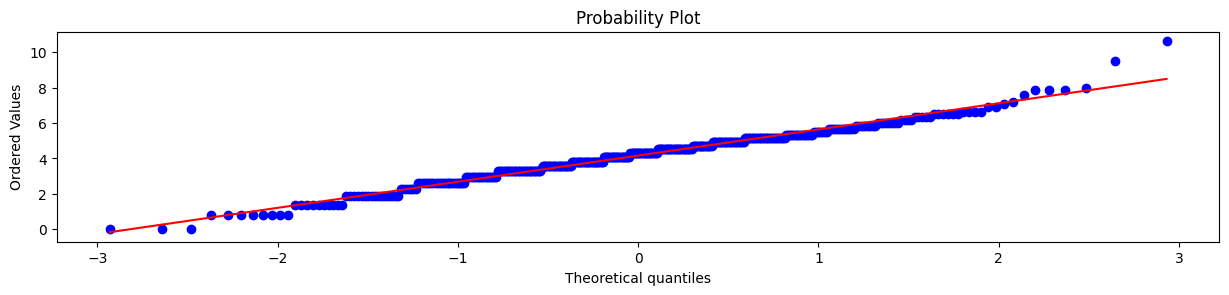

In [37]:
# se realiza la prueba visual de homogeneidad pra la transformación box-cox

fig = plt.figure(figsize=figura_tamaño)

ax1 = fig.add_subplot(211)
prob = stats.probplot(ventas_dia['ventas_box'], dist=stats.norm, plot=ax1)

Se aprecia que existe una gran mejora en la homogeneidad de la distr. de la transformación Box-Cox

Se realiza un test Shapiro-Wilk donde la hipótesis inicial es que tiene normalidad.
$$ H_{o} : la \; dist. \; es \; normal$$

In [41]:
from tabulate import tabulate

res_i = stats.shapiro(ventas_dia['ventas'])
res_t = stats.shapiro(ventas_dia['ventas_box'])

print(tabulate([['Ventas', res_i.statistic, res_i.pvalue], ['Ventas-Transf.', res_t.statistic, res_t.pvalue]], headers=['datos','estadistico', 'pvalue']))

datos             estadistico       pvalue
--------------  -------------  -----------
Ventas               0.898394  6.51596e-16
Ventas-Transf.       0.985187  0.000328733


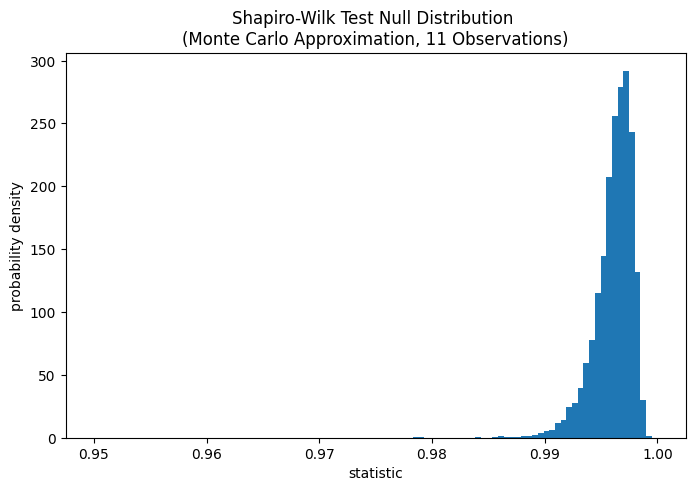

In [69]:
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
x = ventas_dia['ventas_box']
ref = stats.monte_carlo_test(x, stats.norm.rvs, statistic, alternative='less')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.95, 1, 100)
def plot(ax):  # we'll reuse this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title("Shapiro-Wilk Test Null Distribution \n"
                 "(Monte Carlo Approximation, 11 Observations)")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()



0.0003287333238404244

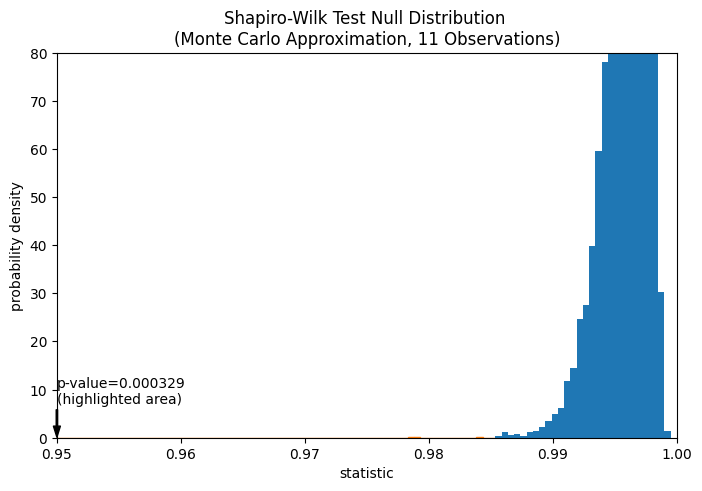

In [73]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={res_t.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (0.95, 0.1), (0.95, 7), arrowprops=props)
i_extreme = np.where(bins <= res_t.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.95, 1)
plt.ylim(0, 80)
plt.show
res_t.pvalue


In [ ]:
ventas_dia

###  Prueba de correlación entre los 10 top productos

In [ ]:
(7.43-42.57*0.08)/0.08

In [ ]:
filtro.dtypes

In [ ]:
filtro

In [ ]:
#graficamos
figura_tamaño = (15,6)
fig, ax1 = plt.subplots(figsize= figura_tamaño)
sns.scatterplot(data=filtro, x='timestamp', y='MovCnt')

### Distribución de productos y combinaciones

In [ ]:
datos_top_filtrados = datos_filtrados[datos_filtrados['PrdCod'].isin(producto_top['PrdCod'].astype(int))]
pivot_df = datos_top_filtrados.pivot_table(index='VenNro', columns='PrdCod', values='VenIteCnt', aggfunc='sum')
pivot_df


In [ ]:
# figura

sns.pairplot(pivot_df, kind="reg", diag_kind='kde')

### Cuándo las personas compran, análisis por horario

In [ ]:
"""
datos_ventas = ventas agrupadas por canasta 
datos_ventas1 = ventas individuales sin agrupar y contiene todos los productos comprados
datos_productos = lista de productos y sus códigos
datos_movimientos = contiene los movimientos realizados con fecha y hora x cada producto

"""

# transformación de datos para data tipo time
datos_ventas['VenHor'] = pd.to_datetime(datos_ventas['VenHor'], format='%H:%M:%S')
datos_ventas.head(5)

In [ ]:
datos_ventas.head(5)

In [ ]:
"""
mostrar como es la distribución según horario de las compras 
"""

#libraries
from matplotlib.dates import DateFormatter

# figura
figura_tamaño = (10,5)
fig, ax1 = plt.subplots(figsize= figura_tamaño)
sns.violinplot(x='VenHor', data=datos_ventas, fill=False, split=True)

# Formato para mostrar solo el tiempo en eje x
date_format = DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(date_format)

* El 75% de las compras se realizan entre las 12hrs y 19: hrs
* Existen dos peak, mañana: 8:30 hrs, y tarde: 19:30 hrs
* Cerca de las 15:00 hrs es el periodo que las personas compran menos.

Qué productos no sean comprado

Tamaño de la canasta por día, semana y mes

In [ ]:
# Create a sample DataFrame
df_time = pd.DataFrame({'B': [0, 1, 2, np.nan, np.nan]},
                       index=[pd.Timestamp('20130101 09:00:00'),
                              pd.Timestamp('20130101 09:00:01'),
                              pd.Timestamp('20130101 09:00:03'),
                              pd.Timestamp('20130101 09:00:04'),
                              pd.Timestamp('20130101 09:00:05')])

# Calculate the rolling sum with a window size of 3
df_time['rolling_sum'] = df_time['B'].rolling(window='3s').sum()

print(df_time)

In [ ]:
# Create a sample DataFrame
data = {'value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# Calculate the rolling sum with a window size of 3
df['rolling_sum'] = df['value'].rolling(window=3).sum()

print(df)